In [1]:
from pathlib import Path
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from utils.predictions import predict_img, convert_idx_img_to_color, get_dataset_generators

BATCH_SIZE = 3

2024-01-16 21:08:59.052090: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
models_dir = Path("../models/cityscapes/")

def _get_activation_from_model_name(model_name: Union[Path, str]) -> str:
    model_name_str = str(model_name) if isinstance(model_name, Path) else model_name

    return "_".join(model_name_str.split("_")[:-1])

In [3]:
activations, models = zip(*[(_get_activation_from_model_name(str(f).split("/")[-1]), str(f)) for f in models_dir.iterdir()])

In [4]:
train_set, val_set = get_dataset_generators(batch_size=BATCH_SIZE)

Found 2972 images belonging to 1 classes.
Found 2972 images belonging to 1 classes.
Found 500 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


2024-01-16 21:09:00.472489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 21:09:00.476287: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 21:09:00.476507: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 21:09:00.477298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-16 21:09:00.477514: I tensorflow/compile

In [5]:
def modulus_activation(x):
    return tf.keras.backend.abs(x)

In [6]:
val_imgs, val_masks = next(val_set)

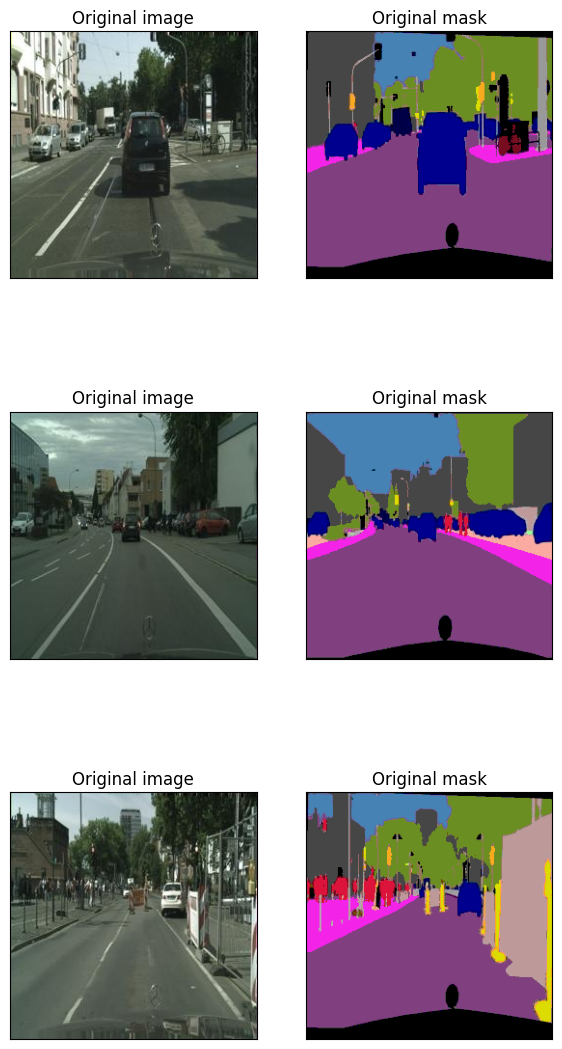

In [7]:
plt.figure(figsize=(7, 14))
for idx, (val_img, val_mask) in enumerate(zip(val_imgs, val_masks), start=0):
    plt.subplot(BATCH_SIZE, 2, 2*idx + 1)
    plt.imshow(val_img)
    plt.title("Original image")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 2, 2*idx + 2)
    converted_mask = convert_idx_img_to_color(tf.expand_dims(tf.argmax(val_mask, axis=-1), axis=0))
    plt.imshow(converted_mask)
    plt.title("Original mask")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
from keras.models import load_model

loaded_models = [load_model(model) for model in models if "modulus" not in model]  # need to fix modulus loading
num_models = len(loaded_models)

2024-01-16 21:09:07.294399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-01-16 21:09:09.176832: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


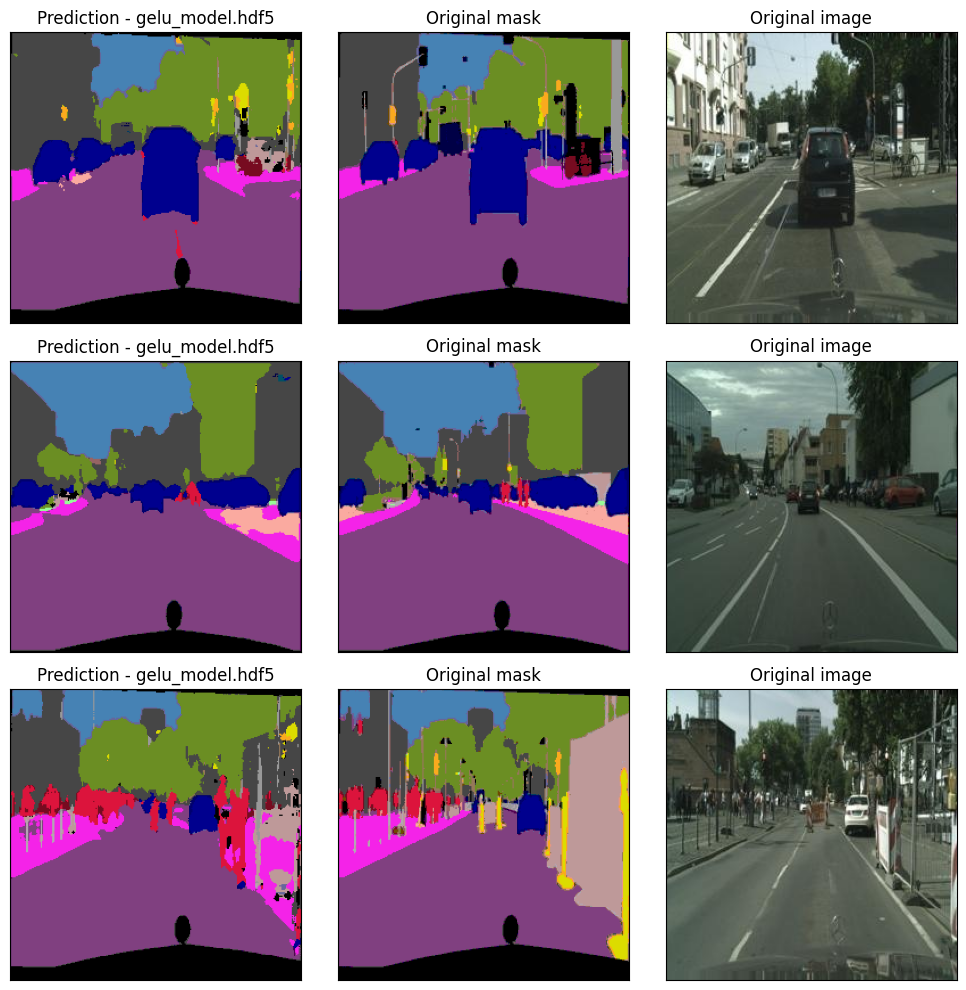

In [9]:
model_idx = 0
plt.figure(figsize=(10, 10))
for idx, (val_img, val_mask) in enumerate(zip(val_imgs, val_masks), start=0):
    plt.subplot(BATCH_SIZE, 3, 3*idx + 1)
    pred_img = predict_img(val_img, loaded_models[model_idx])
    colored_img = convert_idx_img_to_color(pred_img)
    plt.imshow(colored_img)
    plt.title(f"Prediction - {models[model_idx].split('/')[-1]}")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 2)
    converted_mask = convert_idx_img_to_color(tf.expand_dims(tf.argmax(val_mask, axis=-1), axis=0))
    plt.imshow(converted_mask)
    plt.title("Original mask")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 3)
    plt.imshow(val_img)
    plt.title("Original image")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

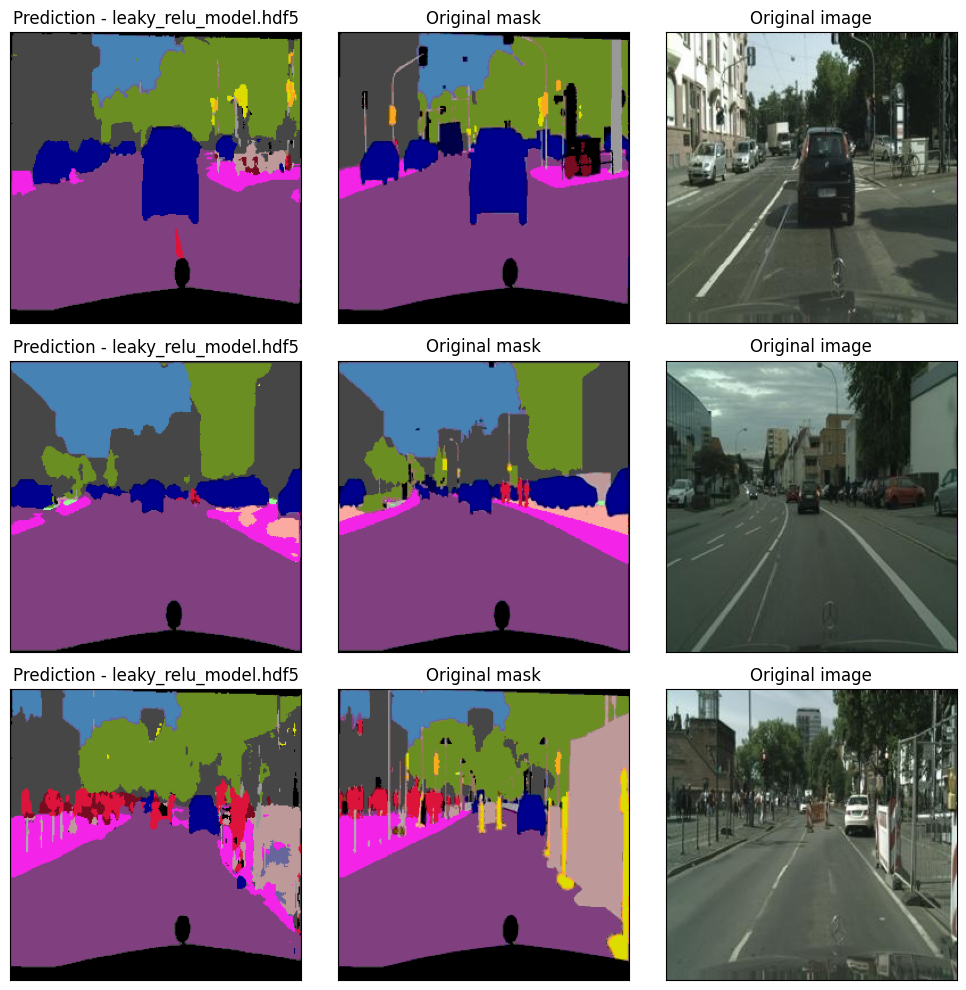

In [10]:
model_idx = 1
plt.figure(figsize=(10, 10))
for idx, (val_img, val_mask) in enumerate(zip(val_imgs, val_masks), start=0):
    plt.subplot(BATCH_SIZE, 3, 3*idx + 1)
    pred_img = predict_img(val_img, loaded_models[model_idx])
    colored_img = convert_idx_img_to_color(pred_img)
    plt.imshow(colored_img)
    plt.title(f"Prediction - {models[model_idx].split('/')[-1]}")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 2)
    converted_mask = convert_idx_img_to_color(tf.expand_dims(tf.argmax(val_mask, axis=-1), axis=0))
    plt.imshow(converted_mask)
    plt.title("Original mask")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 3)
    plt.imshow(val_img)
    plt.title("Original image")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

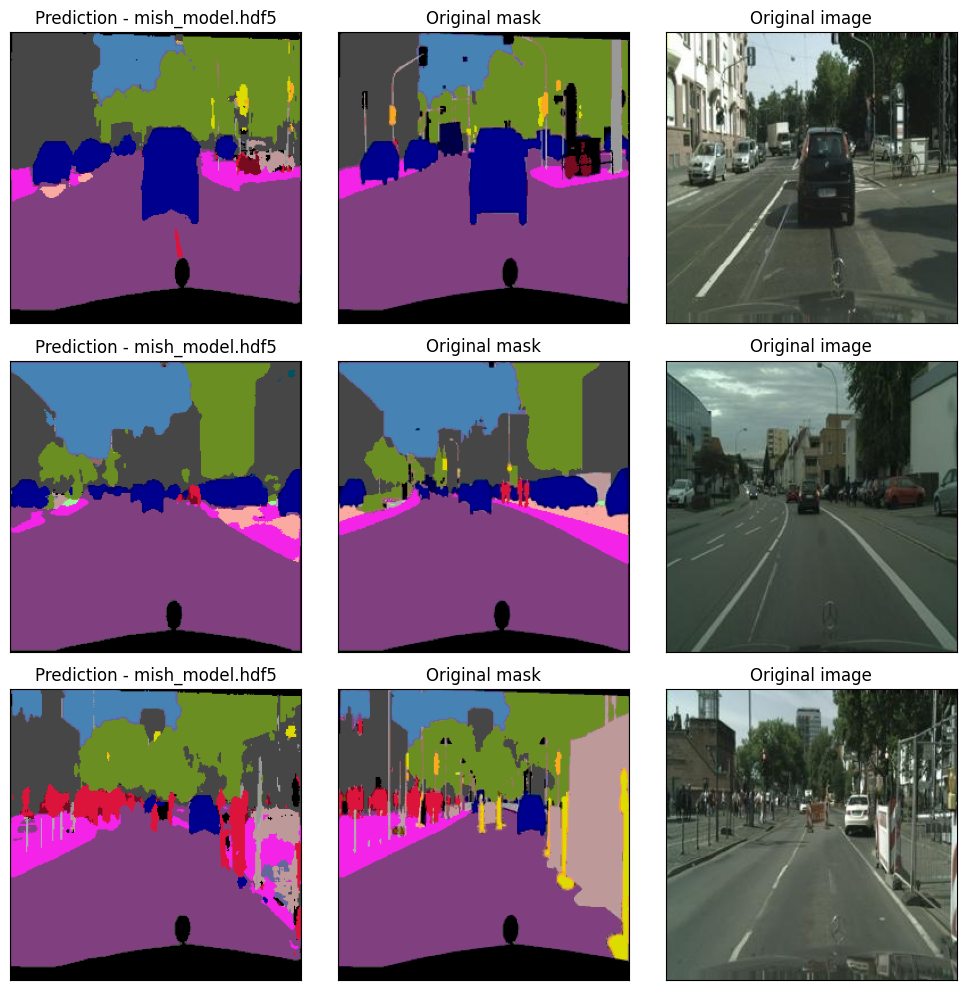

In [11]:
model_idx = 2
plt.figure(figsize=(10, 10))
for idx, (val_img, val_mask) in enumerate(zip(val_imgs, val_masks), start=0):
    plt.subplot(BATCH_SIZE, 3, 3*idx + 1)
    pred_img = predict_img(val_img, loaded_models[model_idx])
    colored_img = convert_idx_img_to_color(pred_img)
    plt.imshow(colored_img)
    plt.title(f"Prediction - {models[model_idx].split('/')[-1]}")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 2)
    converted_mask = convert_idx_img_to_color(tf.expand_dims(tf.argmax(val_mask, axis=-1), axis=0))
    plt.imshow(converted_mask)
    plt.title("Original mask")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 3)
    plt.imshow(val_img)
    plt.title("Original image")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

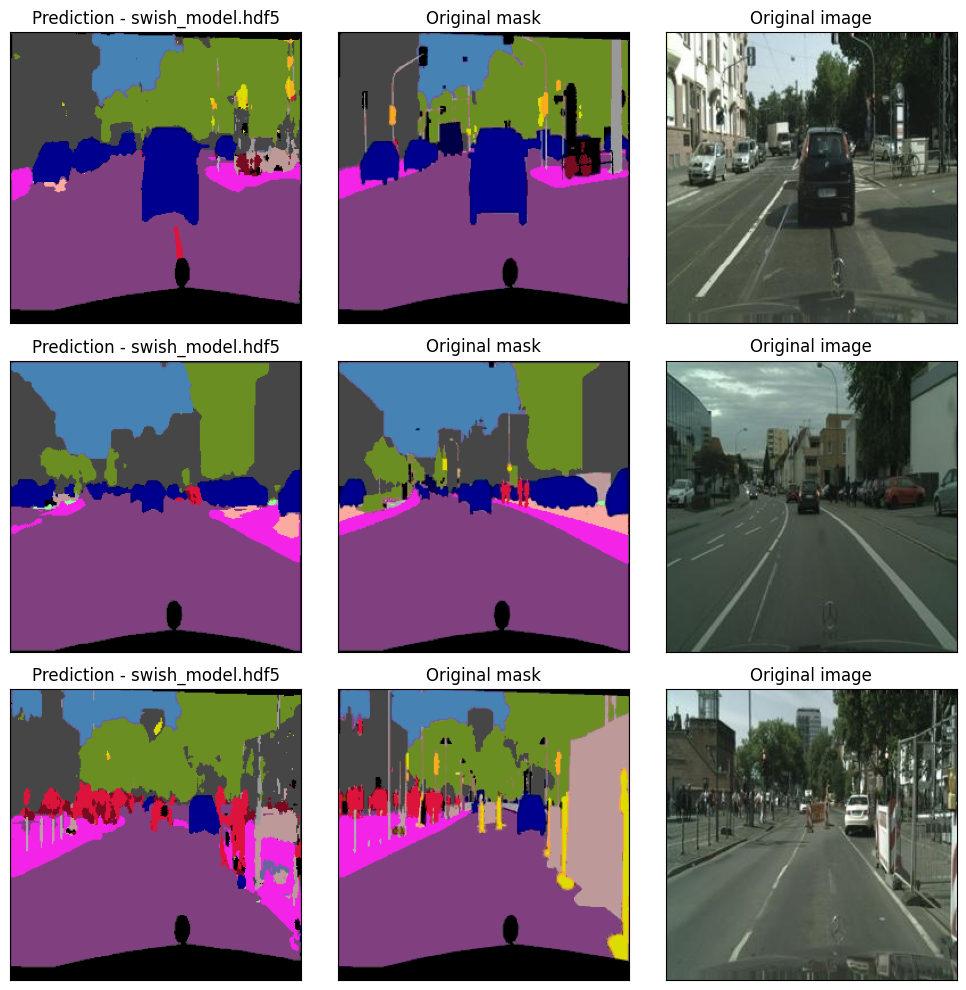

In [12]:
model_idx = 3
plt.figure(figsize=(10, 10))
for idx, (val_img, val_mask) in enumerate(zip(val_imgs, val_masks), start=0):
    plt.subplot(BATCH_SIZE, 3, 3*idx + 1)
    pred_img = predict_img(val_img, loaded_models[model_idx])
    colored_img = convert_idx_img_to_color(pred_img)
    plt.imshow(colored_img)
    plt.title(f"Prediction - {models[model_idx+1].split('/')[-1]}")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 2)
    converted_mask = convert_idx_img_to_color(tf.expand_dims(tf.argmax(val_mask, axis=-1), axis=0))
    plt.imshow(converted_mask)
    plt.title("Original mask")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(BATCH_SIZE, 3, 3*idx + 3)
    plt.imshow(val_img)
    plt.title("Original image")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()